In [246]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp
import sys
sys.path.append("../")
from cfd_rigolli import Cfd_rigolli
cfd = Cfd_rigolli(dirname="/home/vbl/DataAnalysis/data/simulator/figure/Figure_rigolli")
#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc
from scipy.stats import wasserstein_distance
from tqdm import tqdm
import h5py
#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [247]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/results_rigolli.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout

In [248]:
df_test = pd.read_hdf('../../data/simulator/figure/Figure_rigolli/rigolli_jan22.h5')

In [249]:
dirname = '../../data/simulator/figure/Figure_rigolli/'
hmap_data = np.load(str(dirname) + "hmap_with_edges.npz")
    
fitted_p_heatmap=hmap_data['fitted_p_heatmap']
xedges=hmap_data['xedges']
yedges=hmap_data['yedges']


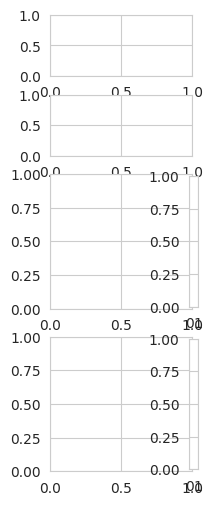

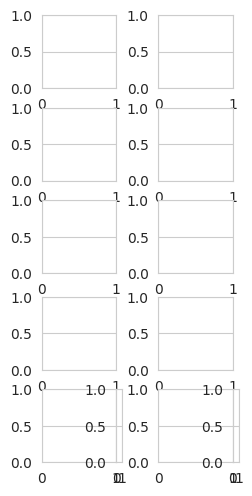

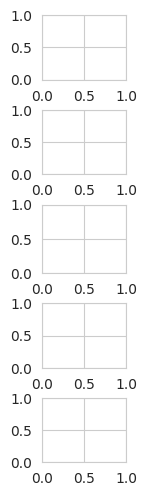

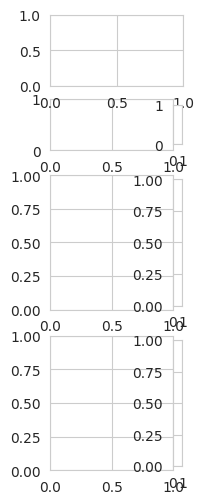

In [250]:
layout=load()

Fig1

In [251]:
ax=layout.axes[('fig1','ax_1')]
x_coords = cfd.x_coords
y_coords = cfd.y_coords

# Load the data file and get the initial frame
with h5py.File(str(dirname)+'nose_data.mat', 'r') as f:
    data = f['nose'][0, :, :]  # Initial frame or highest concentration
    data[data <= 0] = 1e-20    # Handling zero or negative values
    log_data = np.log10(data)  # Log scale if needed

im = ax.imshow(log_data, 
               extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()],
               vmin=-7, 
               vmax=-5,
               cmap='Greys',
               rasterized=True)

ax.set_rasterization_zorder(-20)
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,8],
                           xticks=[5,40],
                           linewidth=0.5)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('1.90 m')
# ax.set_xlabel('9.50 m')

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [252]:
ax=layout.axes[('fig1','ax')]
cax = ax.imshow(
    fitted_p_heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.03, rasterized=True,
)
ax.set_rasterization_zorder(-20)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,8],
                           xticks=[5,40],
                           linewidth=0.5)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('1.90 m')
# ax.set_xlabel('9.50 m')

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [253]:
ax = layout.axes[('fig1', 'cbar1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(O)$",rotation=90, labelpad=-25)

ax.set_yticklabels(['0', '.01'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

Fig2

In [254]:
th=6.5
query1 = 'odor>'+str(th)
new_test_df1=pd.DataFrame()
new_test_df1 = df_test.query(query1)
new_test_df1.reset_index(inplace=True, drop=True)

query2 = 'predicted_odor>'+str(th)
new_test_df2=pd.DataFrame()
new_test_df2 = df_test.query(query2)
new_test_df2.reset_index(inplace=True, drop=True)

In [255]:
ax=layout.axes[('fig1','ax1')]
cax1 = ax.scatter(new_test_df1.distance_along_streakline, new_test_df1.nearest_from_streakline, c=new_test_df1.odor, s=0.5, edgecolors=None, 
                  cmap='Blues', alpha=0.2, vmin=6.5, vmax=8, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('1.90 m')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.ticklabel_format(useOffset=False)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,8],
                           xticks=[5,40],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [256]:
ax = layout.axes[('fig1', 'cbar2')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc$_{cfd}$, a.u",rotation=90, labelpad=-20)

ax.set_yticklabels(['6.5', '8'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

Fig3 - predicted odor scatter plot

In [257]:
ax=layout.axes[('fig1','ax2')]
cax1 = ax.scatter(new_test_df2.distance_along_streakline, new_test_df2.nearest_from_streakline, c=new_test_df2.predicted_odor, 
                  s = 0.5, edgecolors=None,  cmap='Reds', alpha=0.2, vmin=6.5, vmax=8, rasterized=True)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 2, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,8],
                           xticks=[5,40],
                           linewidth=0.5)


ax.set_xlabel('9.50 m')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('1.90 m')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.set_xticklabels([])
ax.grid(False)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [258]:
ax = layout.axes[('fig1', 'cbar3')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc$_{co}$, a.u",rotation=90, labelpad=-20)
ax.set_yticklabels(['6.5', '8'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

Fig4 Time series

In [259]:
ax=layout.axes[('fig2','ax3')]
ax.plot(df_test.time, df_test.odor, linewidth=1,c='#1764ab', rasterized=True)
ax.set_rasterization_zorder(-20)
# xlimTs=[350,355]
xlimTs=[600,620]
ax.set_ylabel('od$_{cfd}$')
ax.yaxis.set_label_coords(-0.07, 0.5)


ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=xlimTs,
                           linewidth=0.5)

# ax.set_yticklabels(['0', '10'], fontweight='bold')

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [260]:
ax=layout.axes[('fig2','ax3_1')]
ax.plot(df_test.time, df_test.predicted_odor, c='#bc141a', linewidth=1, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('20 s')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('od$_{co}$')
ax.yaxis.set_label_coords(-0.07, 0.5)
# ax.set_yticklabels(['0', '10'], fontweight='bold')
ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,10],
                           xticks=xlimTs,
                           linewidth=0.5)
# ax.set_yticklabels(['0', '10'], fontweight='bold')
ax.set_xticklabels([])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

Fig5 - Histogram

In [261]:
n_bins = 20
ylim = (0, 1)  # Set y-limit for normalized values

# Actual Whiff Data
df_actual = new_test_df1.copy()
bins = np.linspace(0, df_actual['distance_from_source'].max(), n_bins + 1)
df_actual['distance_bin'] = pd.cut(df_actual['distance_from_source'], bins=bins)

whiff_counts_actual = df_actual.groupby('distance_bin').size()
mean_concentrations_actual = df_actual.groupby('distance_bin')['odor'].mean()
bin_centers_actual = (bins[:-1] + bins[1:]) / 2

# Normalize actual whiff counts
whiff_counts_actual_normalized = whiff_counts_actual / whiff_counts_actual.max()

# Predicted Whiff Data
df_predicted = new_test_df2.copy()
bins_predicted = np.linspace(0, df_predicted['distance_from_source'].max(), n_bins + 1)
df_predicted['distance_bin'] = pd.cut(df_predicted['distance_from_source'], bins=bins_predicted)

whiff_counts_predicted = df_predicted.groupby('distance_bin').size()
mean_concentrations_predicted = df_predicted.groupby('distance_bin')['predicted_odor'].mean()
bin_centers_predicted = (bins_predicted[:-1] + bins_predicted[1:]) / 2

# Normalize predicted whiff counts
whiff_counts_predicted_normalized = whiff_counts_predicted / whiff_counts_predicted.max()


In [262]:
ax=layout.axes[('fig2','ax4')]
norm_actual = plt.Normalize(6.5, 8)
colors_actual = plt.cm.Blues(norm_actual(mean_concentrations_actual))
ax.bar(bin_centers_actual, whiff_counts_actual_normalized, width=(bins[1] - bins[0]), edgecolor='black', linewidth=0.5, color=colors_actual, rasterized= True)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_xlim(5,40)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=[5,40],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [263]:
ax = layout.axes[('fig2', 'cbar4_1')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

# ax.set_ylabel("wc, a.u",rotation=90, labelpad=-17)
ax.set_yticklabels(['6.5', '8'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [264]:
ax=layout.axes[('fig2','ax5')]
norm_predicted = plt.Normalize(6.5, 8)
colors_predicted = plt.cm.Reds(norm_predicted(mean_concentrations_predicted))
ax.bar(bin_centers_predicted, whiff_counts_predicted_normalized, width=(bins_predicted[1] - bins_predicted[0]), edgecolor='black',linewidth=0.5, color=colors_predicted, rasterized=True)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('Distance from\nsource, m')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('Whiff Count')
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_xlim(5,40)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 7}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=[5,40],
                           linewidth=0.5)
ax.set_xticklabels([])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

In [265]:
ax = layout.axes[('fig2', 'cbar4')]
ytic=[4.5,10]

fpl.colorbar(ax=ax, colormap='Reds', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$\mu$(odor), a.u",rotation=90, labelpad=-17)
ax.set_yticklabels(['6.5', '8'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

Wasserstein distance

In [216]:
new_test_df1=df_test.copy()
new_test_df2=df_test.copy()
def cal_stat(df,idx,df2):
    osc.avg_distance(df,idx,df2)
    osc.mean_conc(df,idx,df2)
    osc.whiff_blank_duration(df,idx,df2)
    osc.std_whiff(df,idx,df2)
    osc.mean_avg(df,idx,df2)
    osc.encounter_frequency(df,idx,df2,1,2)
    osc.mean_t(df,idx,df2)

def cal_stat_predicted(df,idx,df2):
    osc.avg_distance(df,idx,df2)
    osc.predicted_mean_conc(df,idx,df2)
    osc.whiff_blank_duration(df,idx,df2)
    osc.std_whiff_predicted(df,idx,df2)
    osc.mean_avg_predicted(df,idx,df2)
    osc.encounter_frequency_predicted(df,idx,df2,1,2)
    osc.mean_t(df,idx,df2)
th = 6.5
np.seterr(divide='ignore')
index = osc.get_index(new_test_df1.odor,th)
index_predicted = osc.get_index(new_test_df2.predicted_odor,th)
fdf1 = pd.DataFrame()
fdf_predicted = pd.DataFrame()

cal_stat(new_test_df1,index,fdf1)
cal_stat_predicted(new_test_df2,index_predicted, fdf_predicted)

/home/vbl/DataAnalysis/plume_sim/figure/../odor_stat_calculations.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.efreq.iloc[start] = 1


In [217]:
def wd_cal(x_true,y_true, x_pred, y_pred, label1):
    x_bins = np.linspace(min(x_true.min(), x_pred.min()), max(x_true.max(), x_pred.max()), 30)
    y_bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 30)

    # Compute 2D histograms (normalized)
    true_hist, _, _ = np.histogram2d(x_true, y_true, bins=[x_bins, y_bins], density=True)
    pred_hist, _, _ = np.histogram2d(x_pred, y_pred, bins=[x_bins, y_bins], density=True)


    true_hist = true_hist / true_hist.max()
    pred_hist = pred_hist / pred_hist.max()
    
    # Flatten the histograms for Wasserstein computation
    true_flat = true_hist.flatten()
    pred_flat = pred_hist.flatten()

    # Calculate observed 2D Wasserstein Distance
    observed_wd_2d = wasserstein_distance(true_flat, pred_flat)

    # Bootstrapping function
    def bootstrap_wasserstein_2d(true_hist, pred_hist, n_bootstraps=1000):
        distances = []
        for _ in tqdm(range(n_bootstraps)):
            # Resample from the histograms
            resampled_true = np.random.poisson(true_hist)
            resampled_pred = np.random.poisson(pred_hist)
            
            # Flatten the resampled histograms
            resampled_true_flat = resampled_true.flatten()
            resampled_pred_flat = resampled_pred.flatten()
            
            # Compute Wasserstein Distance
            distance = wasserstein_distance(resampled_true_flat, resampled_pred_flat)
            distances.append(distance)
        
        return distances

    n_bootstraps = 1000
    bootstrap_distances = bootstrap_wasserstein_2d(true_hist, pred_hist, n_bootstraps)
    p_value = np.mean(np.array(bootstrap_distances) >= observed_wd_2d)
    # plot_wd(bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1, vmin, vmax)
    return bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1


In [218]:
vmax=1 
vmin=0
wd_color='Blues'
wd_pr_color="Reds"
wd_map_color='dimgray'

In [219]:
## WHIFF DURATION
bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1 = wd_cal(fdf1.log_avg_dist_from_source, 
                                                                                                    fdf1.log_whiff, fdf_predicted.log_avg_dist_from_source, 
                                                                                                    fdf_predicted.log_whiff, 'wd, s')
ax=layout.axes[('fig3','ax6')]
ax.imshow(true_hist.T, cmap=wd_color, vmin=vmin, vmax=vmax,rasterized=True)
ax.invert_yaxis()
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax.set_ylabel('wd$_{cfd}$')
ax.yaxis.set_label_coords(-0.09, 0.5)

ax.grid(False)
# ax.set_xticklabels([])
ax.set_yticklabels([r'$10^{-2.5}$', r'$10^{1.5}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax1=layout.axes[('fig3','ax6_1')]
ax1.imshow(pred_hist.T, cmap=wd_pr_color, vmin=vmin, vmax=vmax,rasterized=True)
ax1.invert_yaxis()
ax1.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax1, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax1.set_ylabel('wd$_{co}$')
ax1.yaxis.set_label_coords(-0.09, 0.5)

ax1.grid(False)
ax1.set_xticklabels([])
# ax1.set_yticklabels([r'$10^{-2.5}$', r'$10^{1.5}$'])
ax1.set_yticklabels([])
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')


ax2=layout.axes[('fig4','ax11')]
n, bins, patches = ax2.hist(bootstrap_distances, bins=30, color=wd_map_color,  linewidth=0.5, alpha=1, density=True, rasterized=True)
kde = gaussian_kde(bootstrap_distances)
x_vals = np.linspace(min(bootstrap_distances), max(bootstrap_distances), 300)
ax2.plot(x_vals, kde(x_vals), color=wd_map_color, linewidth=0.5)
ax2.axvline(observed_wd_2d, color='red', linestyle='--', linewidth=1)
ax2.set_rasterization_zorder(-20)
ax2.yaxis.set_label_coords(-0.07, 0.5)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,100],
                           xticks=[0,0.07],
                           linewidth=0.5)
ax2.set_xticklabels(['0','0.07'])
ax2.set_ylabel('count')
ax2.yaxis.set_label_coords(-0.07, 0.5)
ax2.grid(False)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 8666.76it/s]


In [220]:
bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1 = wd_cal(fdf1.log_avg_dist_from_source, 
                                                                                                    fdf1.wf, fdf_predicted.log_avg_dist_from_source, 
                                                                                                    fdf_predicted.wf, 'wf, hz')
ax=layout.axes[('fig3','ax7')]
ax.imshow(true_hist.T, cmap=wd_color, vmin=vmin, vmax=vmax,rasterized=True)
ax.invert_yaxis()
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel('wf$_{cfd}$')
ax.yaxis.set_label_coords(-0.09, 0.5)

ax.grid(False)
# ax.set_xticklabels([])
ax.set_yticklabels([r'$0$', r'$8$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax1=layout.axes[('fig3','ax7_1')]
ax1.imshow(pred_hist.T, cmap=wd_pr_color, vmin=vmin, vmax=vmax,rasterized=True)
ax1.invert_yaxis()
ax1.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax1, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax1.set_ylabel('wf$_{co}$')
ax1.yaxis.set_label_coords(-0.09, 0.5)

ax1.grid(False)
# ax1.set_xticklabels([])
ax1.set_yticklabels([])
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax2=layout.axes[('fig4','ax12')]
n, bins, patches = ax2.hist(bootstrap_distances, bins=30, color=wd_map_color,  linewidth=0.5, alpha=1, density=True, rasterized=True)
kde = gaussian_kde(bootstrap_distances)
x_vals = np.linspace(min(bootstrap_distances), max(bootstrap_distances), 300)
ax2.plot(x_vals, kde(x_vals), color=wd_map_color, linewidth=0.5)
ax2.axvline(observed_wd_2d, color='red', linestyle='--', linewidth=1)
ax2.set_rasterization_zorder(-20)
ax2.yaxis.set_label_coords(-0.07, 0.5)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,100],
                           xticks=[0,0.07],
                           linewidth=0.5)
ax2.set_xticklabels(['0','0.07'])
ax2.set_ylabel('count')
ax2.yaxis.set_label_coords(-0.07, 0.5)
ax2.grid(False)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 7415.97it/s]


In [221]:
## WHIFF CONC
bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1 = wd_cal(fdf1.log_avg_dist_from_source, 
                                                                                                    fdf1.mean_concentration, fdf_predicted.log_avg_dist_from_source, 
                                                                                                    fdf_predicted.mean_concentration, 'wc, a.u.')
ax=layout.axes[('fig3','ax8')]
ax.imshow(true_hist.T, cmap=wd_color, vmin=vmin, vmax=vmax,rasterized=True)
ax.invert_yaxis()
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax.set_ylabel('wc$_{cfd}$')
ax.yaxis.set_label_coords(-0.09, 0.5)

ax.grid(False)
# ax.set_xticklabels([])
ax.set_yticklabels([r'$6.5$', r'$10$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax1=layout.axes[('fig3','ax8_1')]
ax1.imshow(pred_hist.T, cmap=wd_pr_color, vmin=vmin, vmax=vmax,rasterized=True)
ax1.invert_yaxis()
ax1.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax1, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)

ax1.set_ylabel('wc$_{co}$')
ax1.yaxis.set_label_coords(-0.09, 0.5)

ax1.grid(False)
# ax1.set_xticklabels([])
ax1.set_yticklabels([])
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax2=layout.axes[('fig4','ax13')]
n, bins, patches = ax2.hist(bootstrap_distances, bins=30, color=wd_map_color,  linewidth=0.5, alpha=0.6, density=True, rasterized=True)
kde = gaussian_kde(bootstrap_distances)
x_vals = np.linspace(min(bootstrap_distances), max(bootstrap_distances), 300)
ax2.plot(x_vals, kde(x_vals), color=wd_map_color, linewidth=0.5)
ax2.axvline(observed_wd_2d, color='red', linestyle='--', linewidth=1)
ax2.set_rasterization_zorder(-20)
ax2.yaxis.set_label_coords(-0.07, 0.5)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,100],
                           xticks=[0,0.1],
                           linewidth=0.5)
ax2.set_xticklabels(['0','0.1'])
ax2.set_ylabel('count')
ax2.yaxis.set_label_coords(-0.07, 0.5)
ax2.grid(False)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 8042.43it/s]


In [222]:
## WHIFF MOVING AVG
bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1 = wd_cal(fdf1.log_avg_dist_from_source, 
                                                                                                    fdf1.whiff_ma, fdf_predicted.log_avg_dist_from_source, 
                                                                                                    fdf_predicted.whiff_ma, 'wma, a.u.')
ax=layout.axes[('fig3','ax9')]
ax.imshow(true_hist.T, cmap=wd_color, vmin=vmin, vmax=vmax,rasterized=True)
ax.invert_yaxis()
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax.set_ylabel('wma$_{cfd}$')
ax.yaxis.set_label_coords(-0.09, 0.5)

ax.grid(False)
# ax.set_xticklabels([])
ax.set_yticklabels([r'$0$', r'$10$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax1=layout.axes[('fig3','ax9_1')]
ax1.imshow(pred_hist.T, cmap=wd_pr_color, vmin=vmin, vmax=vmax,rasterized=True)
ax1.invert_yaxis()
ax1.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax1, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 3,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)
ax1.set_ylabel('wma$_{co}$')
ax1.yaxis.set_label_coords(-0.09, 0.5)

ax1.grid(False)
# ax1.set_xticklabels([])
ax1.set_yticklabels([])
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax2=layout.axes[('fig4','ax14')]
n, bins, patches = ax2.hist(bootstrap_distances, bins=30, color=wd_map_color, linewidth=0.5, alpha=1, density=True, rasterized=True)
kde = gaussian_kde(bootstrap_distances)
x_vals = np.linspace(min(bootstrap_distances), max(bootstrap_distances), 300)
ax2.plot(x_vals, kde(x_vals), color=wd_map_color, linewidth=0.5)
ax2.axvline(observed_wd_2d, color='red', linestyle='--', linewidth=1)
ax2.set_rasterization_zorder(-20)
ax2.yaxis.set_label_coords(-0.07, 0.5)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,100],
                           xticks=[0,0.09],
                           linewidth=0.5)
ax2.set_xticklabels(['0','0.09'])
ax2.set_ylabel('count')
ax2.yaxis.set_label_coords(-0.07, 0.5)
ax2.grid(False)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 7922.23it/s]


In [223]:
## WHIFF STDEV
bootstrap_distances, observed_wd_2d, p_value, true_hist, pred_hist, label1 = wd_cal(fdf1.log_avg_dist_from_source, 
                                                                                                    fdf1.std_whiff, fdf_predicted.log_avg_dist_from_source, 
                                                                                                    fdf_predicted.std_whiff, 'wsd, a.u.')
ax=layout.axes[('fig3','ax10')]
ax.imshow(true_hist.T, cmap=wd_color, vmin=vmin, vmax=vmax,rasterized=True)
ax.invert_yaxis()
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 2,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel('wsd$_{cfd}$')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Distance\nfrom\nsource, m')
ax.xaxis.set_label_coords(0.5, -0.20)

ax.grid(False)
ax.set_xticklabels([r'$10^{0.7}$', r'$10^{1.8}$'])
ax.set_yticklabels([r'$0$', r'$1.5$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax1=layout.axes[('fig3','ax10_1')]
ax1.imshow(pred_hist.T, cmap=wd_pr_color, vmin=vmin, vmax=vmax,rasterized=True)
ax1.invert_yaxis()
ax1.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax1, ['left', 'bottom'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 2,'bottom': 5}, 
                                    xticks=[0,30],
                                    yticks=[0,30],
                                    tick_length=1.5,
                                    linewidth=0.5)

ax1.set_ylabel('wsd$_{co}$')
ax1.yaxis.set_label_coords(-0.09, 0.5)
ax1.set_xlabel('Distance\nfrom\nsource, m')
ax1.xaxis.set_label_coords(0.5, -0.20)

ax1.grid(False)
ax1.set_yticklabels([])
ax1.set_xticklabels([r'$10^{0.7}$', r'$10^{1.8}$'])
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_hws.svg')

ax2=layout.axes[('fig4','ax15')]
n, bins, patches = ax2.hist(bootstrap_distances, bins=30, color=wd_map_color, linewidth=0.5, alpha=1, density=True, rasterized=True)
kde = gaussian_kde(bootstrap_distances)
x_vals = np.linspace(min(bootstrap_distances), max(bootstrap_distances), 300)
ax2.plot(x_vals, kde(x_vals), color=wd_map_color, linewidth=0.5)
ax2.axvline(observed_wd_2d, color='red', linestyle='--', linewidth=1)
ax2.set_rasterization_zorder(-20)
ax2.yaxis.set_label_coords(-0.07, 0.5)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 3, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,100],
                           xticks=[0,0.06],
                           linewidth=0.5)

ax2.set_xticklabels(['0','0.06'])
ax2.set_ylabel('count')
ax2.yaxis.set_label_coords(-0.07, 0.5)
ax2.set_xlabel('Wasserstein\ndistance (Wd)')
ax2.xaxis.set_label_coords(0.5, -0.3)

ax2.grid(False)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 8663.11it/s]


In [224]:
ax = layout.axes[('fig3', 'cbar_5_1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Blues', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("density",rotation=90, labelpad=-15)

ax.set_yticklabels(['0', '1'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')


ax1 = layout.axes[('fig3', 'cbar_5')]
ytic=[0,10]

fpl.colorbar(ax=ax1, colormap='Reds', orientation='vertical',ticks=ytic)
ax1.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax1, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax1.set_ylabel("density",rotation=90, labelpad=-14)

ax1.set_yticklabels(['0', '1'])
ax1.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax1, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_rigolli.svg')

100%|██████████| 1000/1000 [00:00<00:00, 7981.56it/s]


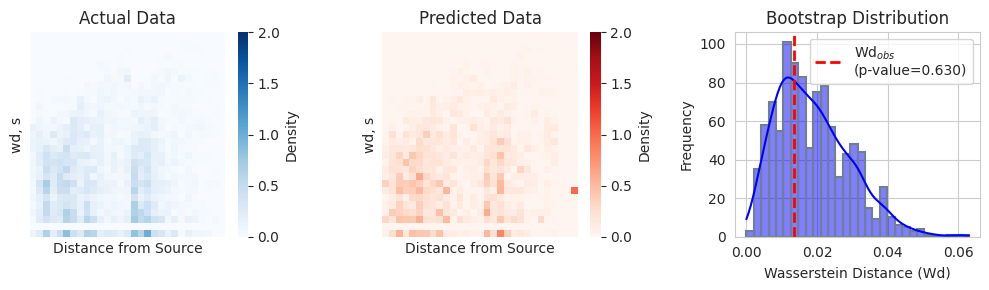

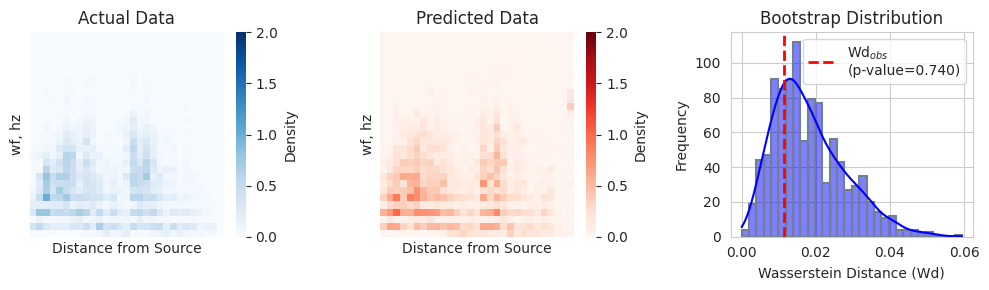

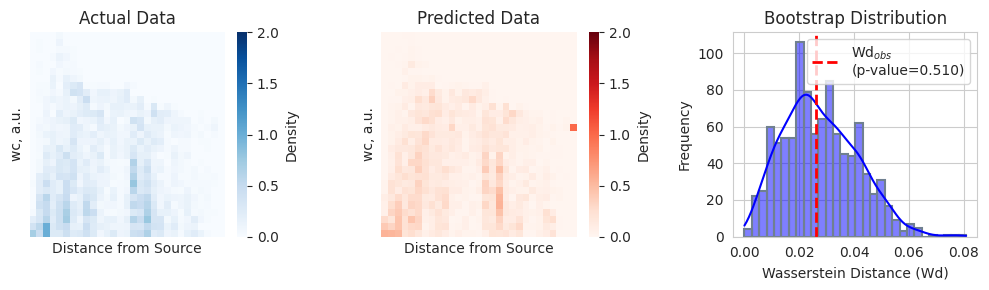

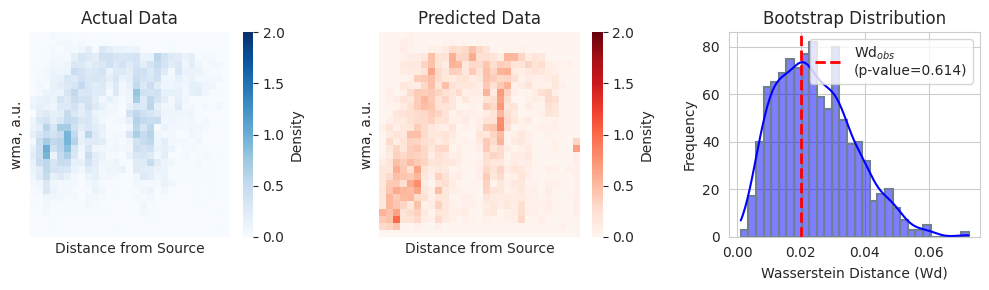

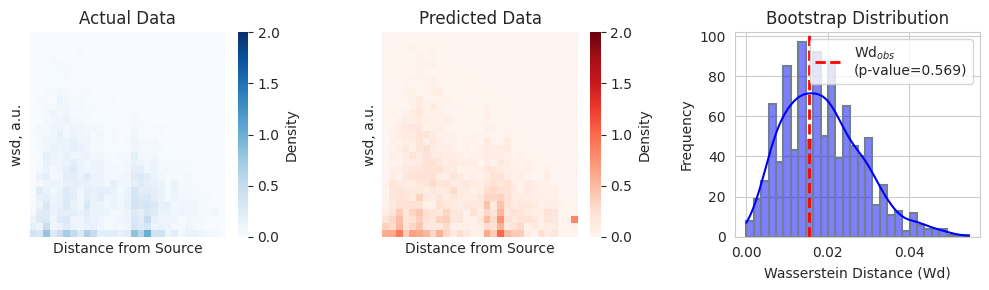

In [156]:
osc.wd_cal(fdf1.log_avg_dist_from_source, fdf1.log_whiff, fdf_predicted.log_avg_dist_from_source, fdf_predicted.log_whiff, 'wd, s', 0,2)
osc.wd_cal(fdf1.log_avg_dist_from_source, fdf1.wf, fdf_predicted.log_avg_dist_from_source, fdf_predicted.wf, 'wf, hz', 0,2)
osc.wd_cal(fdf1.log_avg_dist_from_source, fdf1.mean_concentration, fdf_predicted.log_avg_dist_from_source, fdf_predicted.mean_concentration, 'wc, a.u.', 0,2)
osc.wd_cal(fdf1.log_avg_dist_from_source, fdf1.whiff_ma, fdf_predicted.log_avg_dist_from_source, fdf_predicted.whiff_ma, 'wma, a.u.', 0,2)
osc.wd_cal(fdf1.log_avg_dist_from_source, fdf1.std_whiff, fdf_predicted.log_avg_dist_from_source, fdf_predicted.std_whiff, 'wsd, a.u.', 0,2)